In [1]:
pip install sumy

     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 10.0MB 5.5MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=adb61a468291fa9d7d69b9fc15681cbcf89018682842943b239e17decc460942
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21684 sha256=55dcad66cce1a329c53a3c9f4fd1fff592875afabe5b0f564528018c7cef5bdf
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
Successfully built pycountry breadability


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
pip install tika

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32885 sha256=71b3954eefe699b8c447800b0cedc76e3dedc5f0a658fb3ab257206a6be20270
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


In [5]:
from tika import parser


rawText = parser.from_file('Monte Carlo.pdf')
rawList = rawText['content'].splitlines()




2020-04-29 07:37:26,850 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-04-29 07:37:27,350 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-04-29 07:37:27,798 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [0]:
rawList = [item for item in rawList if item.strip()] 

In [8]:
rawList_str = ' '.join(rawList) 
print(rawList_str)

120 CHAPTER 5. MONTE CARLO METHODS This is the general problem of maintaining exploration, as discussed in the context of the n-armed bandit problem in Chapter 2. For policy evaluation to work for action values, we must assure continual exploration. One way to do this is by specifying that the episodes start in a state–action pair, and that every pair has a nonzero probability of being selected as the start. This guarantees that all state–action pairs will be visited an infinite number of times in the limit of an infinite number of episodes. We call this the assumption of exploring starts. The assumption of exploring starts is sometimes useful, but of course it cannot be relied upon in general, particularly when learning directly from actual interaction with an environment. In that case the starting conditions are unlikely to be so helpful. The most common alternative approach to assuring that all state–action pairs are encountered is to consider only policies that are stochastic with 

In [0]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(rawList_str.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [12]:

print(total_grams[:10])

[('120', 'CHAPTER', '5.', 'MONTE', 'CARLO', 'METHODS', 'This'), ('CHAPTER', '5.', 'MONTE', 'CARLO', 'METHODS', 'This', 'is'), ('5.', 'MONTE', 'CARLO', 'METHODS', 'This', 'is', 'the'), ('MONTE', 'CARLO', 'METHODS', 'This', 'is', 'the', 'general'), ('CARLO', 'METHODS', 'This', 'is', 'the', 'general', 'problem'), ('METHODS', 'This', 'is', 'the', 'general', 'problem', 'of'), ('This', 'is', 'the', 'general', 'problem', 'of', 'maintaining'), ('is', 'the', 'general', 'problem', 'of', 'maintaining', 'exploration,'), ('the', 'general', 'problem', 'of', 'maintaining', 'exploration,', 'as'), ('general', 'problem', 'of', 'maintaining', 'exploration,', 'as', 'discussed')]


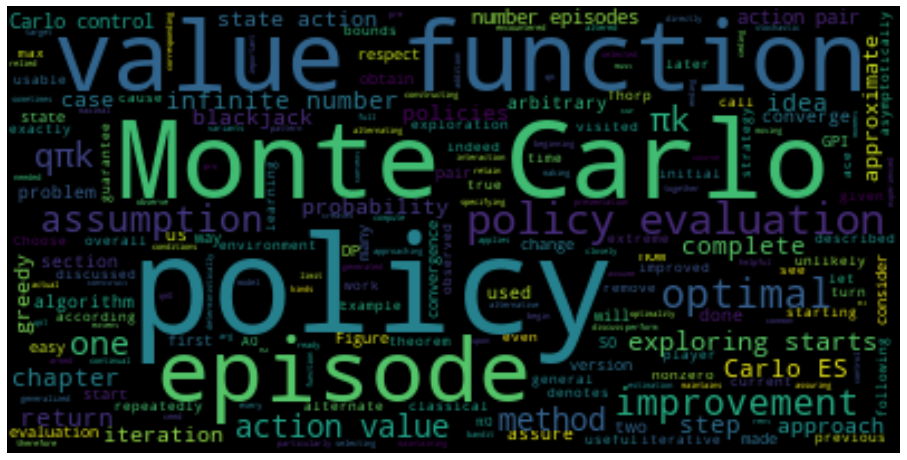

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(rawList_str)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
import collections
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

import nltk
nltk.download('stopwords')

def word_tokenizer(text):
    #tokenizes and stems the text
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens

def cluster_sentences(sentences, nb_of_clusters=5):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                            stop_words=stopwords.words('english'),
                                            max_df=0.9,
                                            min_df=0.1,
                                            lowercase=True)
    #builds a tf-idf matrix for the sentences
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    kmeans = KMeans(n_clusters=nb_of_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
            clusters[label].append(i)
    return dict(clusters)

if __name__ == "__main__":
    sentences = rawList

    nclusters= 10
    clusters = cluster_sentences(sentences, nclusters)
    for cluster in range(nclusters):
            print ("cluster ",cluster,":")
            for i,sentence in enumerate(clusters[cluster]):
                    print ("\tsentence ",i,": ",sentences[sentence])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


cluster  0 :
	sentence  0 :  120 CHAPTER 5. MONTE CARLO METHODS
	sentence  1 :  full Monte Carlo control method.
	sentence  2 :  5.3 Monte Carlo Control
	sentence  3 :  We are now ready to consider how Monte Carlo estimation can be used in
	sentence  4 :  5.3. MONTE CARLO CONTROL 121
	sentence  5 :  To begin, let us consider a Monte Carlo version of classical policy iteration.
	sentence  6 :  these assumptions, the Monte Carlo methods will compute each qπk exactly,
	sentence  7 :  to the optimal policy and optimal value function. In this way Monte Carlo
	sentence  8 :  guarantee of convergence for the Monte Carlo method. One was that the
	sentence  9 :  122 CHAPTER 5. MONTE CARLO METHODS
	sentence  10 :  In both DP and Monte Carlo cases there are two ways to solve the problem.
	sentence  11 :  For Monte Carlo policy evaluation it is natural to alternate between eval-
	sentence  12 :  along these lines is given in Figure 5.4. We call this algorithm Monte Carlo
	sentence  13 :  ES, for M

In [0]:
textfile = open('Input.txt', 'w')
textfile.write(rawList_str)
textfile.close()

In [31]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 30


if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Automatic_summarization"
    #parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    parser = PlaintextParser.from_file("Input.txt", Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)
       

For policy evaluation to work for action values, we must assure continual exploration.
The assumption of exploring starts is sometimes useful, but of course it cannot be relied upon in general, particularly when learning directly from actual interaction with an environment.
The most common alternative approach to assuring that all state–action pairs are encountered is to consider only policies that are stochastic with a nonzero probability of selecting all actions in each state.
For now, we retain the assumption of exploring starts and complete the presentation of a full Monte Carlo control method.
The value function is repeatedly altered to more closely approximate the value function for the cur- rent policy, and the policy is repeatedly improved with respect to the current value function: π q evaluation q → qπ improvement π→greedy(q) These two kinds of changes work against each other to some extent, as each creates a moving target for the other, but together they cause both policy an

In [0]:
from tika import parser
summary = parser.from_file('Summary.pdf')

summaryFinal = summary['content'].splitlines()

summaryFinal = [item for item in summaryFinal if item.strip()] 
 
FSum = ' '.join(summaryFinal)

Text(0.5, 1.0, 'Comparing number of words per sentence distribution in Original vs Summarixed text')

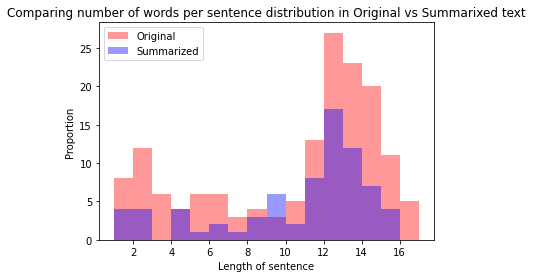

In [33]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer

%matplotlib inline
from matplotlib import pyplot as plt



tokenizer = RegexpTokenizer(r'\w+')

clinton_words = tokenizer.tokenize(rawList_str)
trump_words = tokenizer.tokenize(FSum)

clinton_sentences = rawList_str.replace("?", ".").split(".")
trump_sentences = FSum.replace("?", ".").split(".")


clin_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in rawList]
tr_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in summaryFinal]

clin_sent_len = [i for i in clin_sent_lenghs if i!=0]
tr_sent_len = [i for i in tr_sent_lenghs if i!=0]

plt.hist(clin_sent_len, bins=range(min(clin_sent_len), max(clin_sent_len) + 1, 1),
              alpha=0.4, color="red")
plt.hist(tr_sent_len, bins=range(min(tr_sent_len), max(tr_sent_len) + 1, 1), 
              alpha=0.4, color="blue")

labels = ['Original',"Summarized"]
plt.legend(labels)
plt.xlabel("Length of sentence")
plt.ylabel("Proportion")
plt.title("Comparing number of words per sentence distribution in Original vs Summarixed text")